# Import relevant library

In [57]:
!!pip install TextBlob

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Requirement already satisfied: TextBlob in /usr/local/lib/python3.7/dist-packages (0.15.3)',
 'Requirement already satisfied: nltk>=3.1 in /usr/local/lib/python3.7/dist-packages (from TextBlob) (3.2.5)',
 'Requirement already satisfied: six in /usr/local/lib/python3.7/dist-packages (from nltk>=3.1->TextBlob) (1.15.0)']

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
!pip install tweepy
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob #check this library asap

from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Twitter data cleaning

## Load tweeter file data from the previous chapter

In [60]:
#Import Data or read data
data = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/EV.csv")


In [61]:
data.head()

,timestamp,Text,username,all_hashtags,followers_count
0,5/9/2022 20:16,b'You are deliberately over complicating the #...,b'InfoMgmtExec',"['EV', 'battery']",2901
1,5/9/2022 20:16,b'Fisker Says It\xe2\x80\x99s Targeting An Ove...,b'STBeancounter',['ev'],872
2,5/9/2022 20:14,b'$NVVE News Screener Alert: The price is up a...,b'StocksoftheDay_',"['StocksoftheDay', 'StockAlert', 'StockNews', ...",313
3,5/9/2022 20:14,b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $F...,b'fiskeratiblog',"['EV', 'ElectricVehicle', 'ElectricCars', 'GoE...",640
4,5/9/2022 20:12,"b'@TheBlakeCheck @Tesla No, but definitely wok...",b'magneaus',"['ElectricVehicle', 'EV']",19


In [62]:
#How many roles and columns
data.shape

(3624, 5)

In [63]:
#clean up the data by creating a def function 
def clean(text):
    text = re.sub(r'@[A-za-z0-9]+','',str(text))   # Removing Mentions 
    text = re.sub(r'#','',text)        # Removing #Tags
    text = re.sub(r'https?:\/\/\S+','',text)  # Removing Hyper links
    text = re.sub('RT[\s]+','',text)          # Removing RT
    pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    text=re.sub(pattern,'',text)  #Removing emojis
    return text

In [64]:
#Apply the def function to coumn called TEXT in your dataset
data["Text"] = data["Text"].apply(clean)

In [65]:
#Visulaised your cleaned data
data.head()

,timestamp,Text,username,all_hashtags,followers_count
0,5/9/2022 20:16,b'You are deliberately over complicating the E...,b'InfoMgmtExec',"['EV', 'battery']",2901
1,5/9/2022 20:16,b'Fisker Says It\xe2\x80\x99s Targeting An Ove...,b'STBeancounter',['ev'],872
2,5/9/2022 20:14,b'$NVVE News Screener Alert: The price is up a...,b'StocksoftheDay_',"['StocksoftheDay', 'StockAlert', 'StockNews', ...",313
3,5/9/2022 20:14,b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $F...,b'fiskeratiblog',"['EV', 'ElectricVehicle', 'ElectricCars', 'GoE...",640
4,5/9/2022 20:12,"b' No, but definitely woke up excited to driv...",b'magneaus',"['ElectricVehicle', 'EV']",19


In [66]:
#Analyse the subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity


**Polarity **refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.

The strength of positive and negative polarities can vary depending on the situation, but they are still considered to be strongly positive or negative. What about weak sentiment? It is common for users to express their emotions using words like ‘quite’ or ‘slightly’. Sentiment analysis tools would treat them as slightly positive or negative. What matters most here is what people feel about something else through non-verbal communication. The use of these words might indicate how much they value an object in a subjective way or not; therefore, subjectivity comes into play here as well.

**Subjectivity** refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

Sentiment analysis tools must be able to distinguish between both polarity and subjectivity in order to analyze users’ opinions correctly. An opinion can have a high degree of subjectivity if it’s expressed as a personal experience, whereas a low degree may indicate someone else’s viewpoint on something else. Sentiments can also have different levels of polarity throughout different ways of communication – e-mails, chats or other posts might be either strongly positive, negative or; in some other cases, they might have even a neutral polarity.

In [67]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [68]:
# Create two new columns 'Subjectivity' & 'Polarity'
data["Subjectivity"] = data["Text"].apply(subjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)

In [69]:
data.head()

,timestamp,Text,username,all_hashtags,followers_count,Subjectivity,Polarity
0,5/9/2022 20:16,b'You are deliberately over complicating the E...,b'InfoMgmtExec',"['EV', 'battery']",2901,0.00000,0.0000
1,5/9/2022 20:16,b'Fisker Says It\xe2\x80\x99s Targeting An Ove...,b'STBeancounter',['ev'],872,0.00000,0.0000
2,5/9/2022 20:14,b'$NVVE News Screener Alert: The price is up a...,b'StocksoftheDay_',"['StocksoftheDay', 'StockAlert', 'StockNews', ...",313,0.25000,0.0000
3,5/9/2022 20:14,b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $F...,b'fiskeratiblog',"['EV', 'ElectricVehicle', 'ElectricCars', 'GoE...",640,0.60000,0.5000
4,5/9/2022 20:12,"b' No, but definitely woke up excited to driv...",b'magneaus',"['ElectricVehicle', 'EV']",19,0.59375,0.2625


In [70]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [71]:
data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [72]:
# store data to csv
data.to_csv('search-mlb_v2', index = False)

In [73]:
data.head()

,timestamp,Text,username,all_hashtags,followers_count,Subjectivity,Polarity,Analysis
0,5/9/2022 20:16,b'You are deliberately over complicating the E...,b'InfoMgmtExec',"['EV', 'battery']",2901,0.00000,0.0000,Neutral
1,5/9/2022 20:16,b'Fisker Says It\xe2\x80\x99s Targeting An Ove...,b'STBeancounter',['ev'],872,0.00000,0.0000,Neutral
2,5/9/2022 20:14,b'$NVVE News Screener Alert: The price is up a...,b'StocksoftheDay_',"['StocksoftheDay', 'StockAlert', 'StockNews', ...",313,0.25000,0.0000,Neutral
3,5/9/2022 20:14,b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $F...,b'fiskeratiblog',"['EV', 'ElectricVehicle', 'ElectricCars', 'GoE...",640,0.60000,0.5000,Positive
4,5/9/2022 20:12,"b' No, but definitely woke up excited to driv...",b'magneaus',"['ElectricVehicle', 'EV']",19,0.59375,0.2625,Positive


In [74]:
def getAnalysissub(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [75]:
data['Sub_Analysis'] = data['Subjectivity'].apply(getAnalysis)

In [76]:
data.head()

,timestamp,Text,username,all_hashtags,followers_count,Subjectivity,Polarity,Analysis,Sub_Analysis
0,5/9/2022 20:16,b'You are deliberately over complicating the E...,b'InfoMgmtExec',"['EV', 'battery']",2901,0.00000,0.0000,Neutral,Neutral
1,5/9/2022 20:16,b'Fisker Says It\xe2\x80\x99s Targeting An Ove...,b'STBeancounter',['ev'],872,0.00000,0.0000,Neutral,Neutral
2,5/9/2022 20:14,b'$NVVE News Screener Alert: The price is up a...,b'StocksoftheDay_',"['StocksoftheDay', 'StockAlert', 'StockNews', ...",313,0.25000,0.0000,Neutral,Positive
3,5/9/2022 20:14,b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $F...,b'fiskeratiblog',"['EV', 'ElectricVehicle', 'ElectricCars', 'GoE...",640,0.60000,0.5000,Positive,Positive
4,5/9/2022 20:12,"b' No, but definitely woke up excited to driv...",b'magneaus',"['ElectricVehicle', 'EV']",19,0.59375,0.2625,Positive,Positive


In [77]:
data['Sub_Analysis'].value_counts()

Positive    2540
Neutral     1084
Name: Sub_Analysis, dtype: int64

In [78]:
data['Analysis'].value_counts()

Positive    1968
Neutral     1317
Negative     339
Name: Analysis, dtype: int64

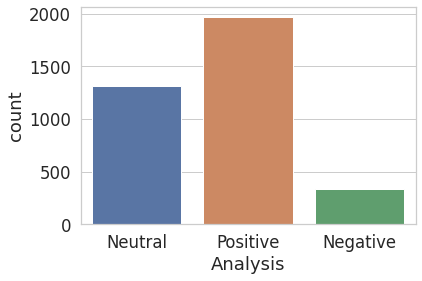

In [79]:
sns.countplot(data['Analysis'])

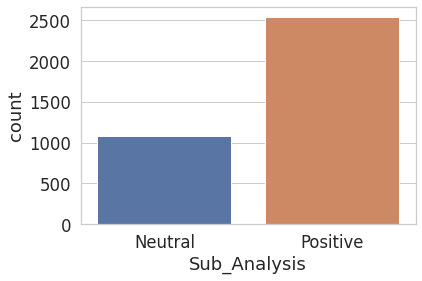

In [80]:
sns.countplot(data['Sub_Analysis'])

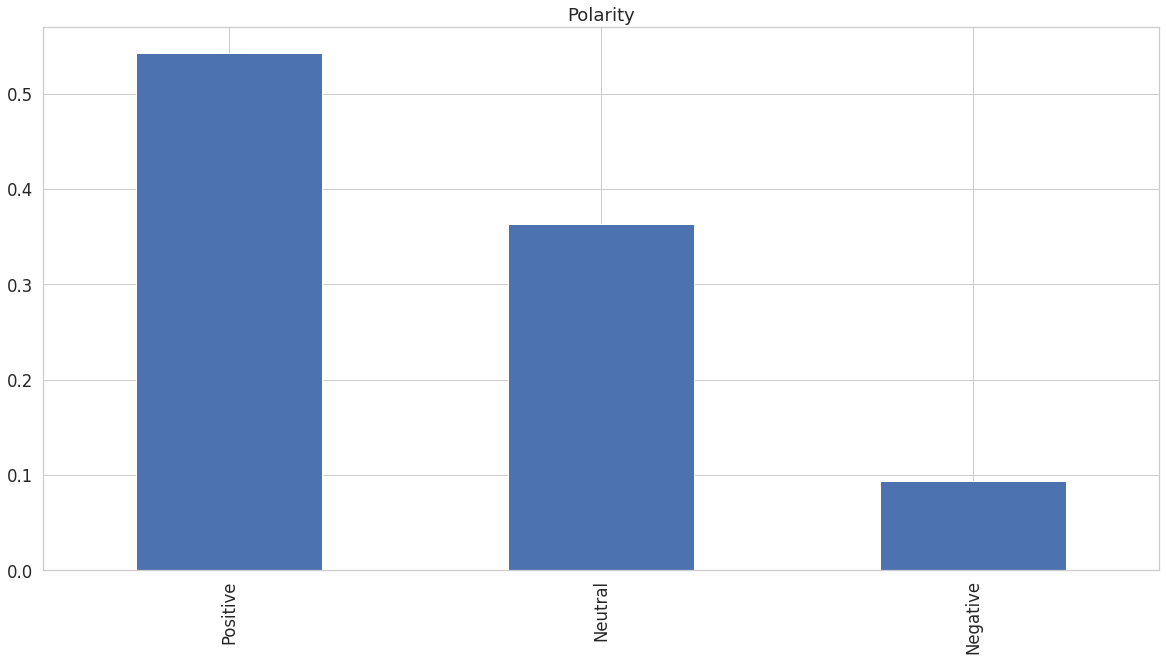

In [81]:
data['Analysis'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Polarity')
plt.show()

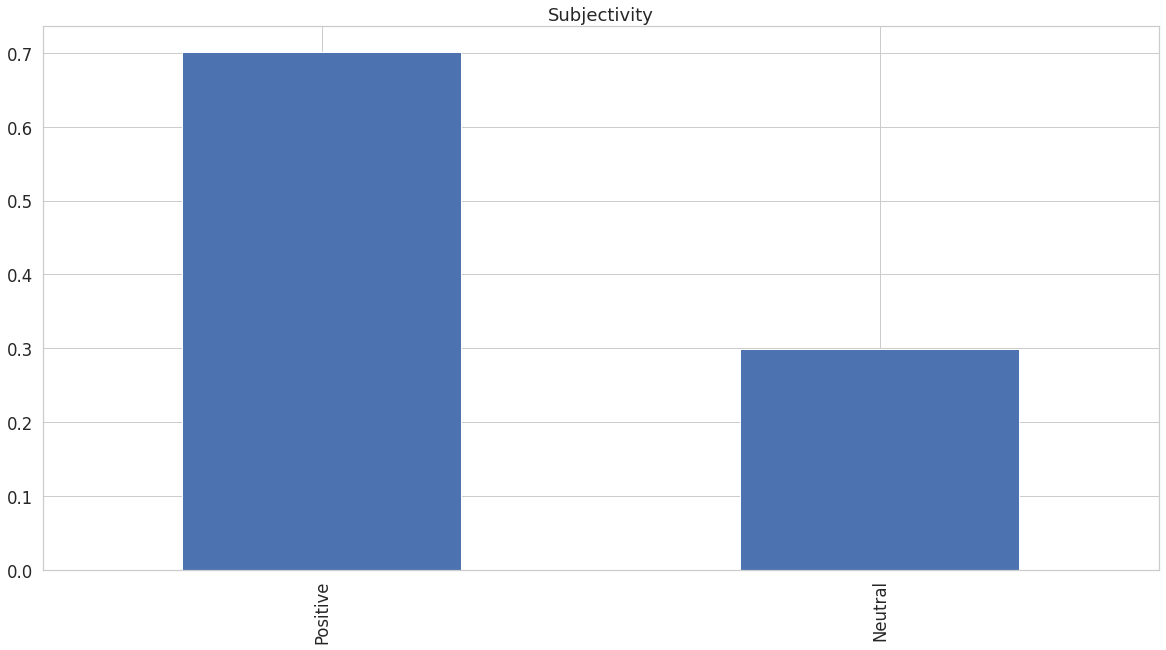

In [82]:
data['Sub_Analysis'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Subjectivity')
plt.show()

In [83]:
#Percentage of Postive tweet
positive = data[data["Analysis"] == "Positive"]
positive = positive["Text"]
print((positive.shape[0]/data.shape[0])*100)

54.3046357615894


In [84]:
#Percentage of Negative Tweet
negative = data[data["Analysis"] == "Negative"]
positive = negative["Text"]
print((negative.shape[0]/data.shape[0])*100)

9.35430463576159


In [85]:
#Percenateg of Neutral Tweet
neutral = data[data["Analysis"] == "Neutral"]
neutral = neutral["Text"]
print((neutral.shape[0]/data.shape[0])*100)

36.341059602649004


In [86]:
#Percentage of Postive subjectivity
positive = data[data["Sub_Analysis"] == "Positive"]
positive = positive["Text"]
print((positive.shape[0]/data.shape[0])*100)

70.08830022075055


In [87]:
#Percentage of Neutral subjectivity
positive = data[data["Sub_Analysis"] == "Neutral"]
positive = positive["Text"]
print((positive.shape[0]/data.shape[0])*100)

29.911699779249446


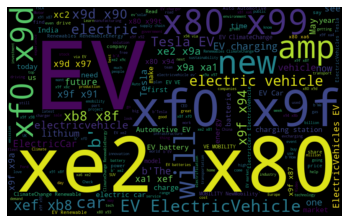

In [88]:
allwords = ' '.join([tweet for tweet in data["Text"]])
wordcloud = WordCloud(height=500,width=800,background_color="black").generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [89]:
#Print postive tweets
print('Printing positive Text:\n')

Printing positive Text:



In [90]:
j=1
sortedDF = data.sort_values(by=['Polarity']) #Sort the tweets


In [91]:
#Print postive tweets
print('Printing positive Text:\n')
j=1
sortedDF = data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
   if( sortedDF['Analysis'][i] == 'Positive'):
     print(str(j) + ') '+ sortedDF['Text'][i])
     print()
     j= j+1

Printing positive Text:

1) b'Love the (Pacific) Ocean \xf0\x9f\x8c\x8a $FSR EV ElectricVehicle ElectricCars GoElectric GoGreen GoFisker 

2) b'  No, but definitely woke up excited to drive a  ElectricVehicle . There are also a lot of other great EV on the market from                 

3) b'From Business Wire: BattleMotors has selected T-Mobile as its preferred IoT provider to connect thousands of new electricvehicle (EV) trucks.  Learn more about partnering with T-Mobile:    TMOPartnerProgram | BattleTrucks 

4) b'From Business Wire: BattleMotors has selected T-Mobile as its preferred IoT provider to connect thousands of new electricvehicle (EV) trucks.  Learn more about partnering with T-Mobile:    TMOPartnerProgram | BattleTrucks 

5) b'Pennsylvania programs give taxpayer dollars to the state\xe2\x80\x99s more affluent residents so they can buy a government-preferred electricvehicles. EV papolitics pasenate pahouse papoli 

6) b"  The  raw materials required for batteries or wiring 

In [92]:
#Print postive tweets
print('Printing positive Text:\n')
j=1
sortedDF = data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
   if( sortedDF['Analysis'][i] == 'Negative'):
     print(str(j) + ') '+ sortedDF['Text'][i])
     print()
     j= j+1

Printing positive Text:

1) b'    It provides ultrafast EV charging that can be installed with existing infrastructure and costs up to 40% less to install than other high-power chargers.     EV EVCharging EVBatteries EVStartups ChargingSolutions'

2) b'Abdul Latif Jameel, the third-largest shareholder of Rivian, has no plans to sell down its stake in the EV maker after a lockup on the stock expired Sunday Saudi  via  '

3) b'\xe2\x9a\xa1 Switch to electric: Tesla Y Dual Motor Long Range Auto 5dr starting from only \xc2\xa3437.06 + VAT / \xc2\xa3524.47 inc VAT per month.  Visit our website to request your personalised quotation:   carleasing contracthire newcar gateway2lease ev 

4) b'  ABSOLUTELY FANTASTIC, ! \xf0\x9f\x90\x90 EV adoption is coming and  is in the game! "A rising tide lifts all ships." Don\'t listen to the haters, Alf!  $IDEX \xf0\x9f\x92\x8e\xf0\x9f\x87\xba\xf0\x9f\x87\xb8 IDEXFAMILY \xf0\x9f\x91\xa8\xe2\x80\x8d\xf0\x9f\x91\xa9\xe2\x80\x8d\xf0\x9f\x91\xa6\xe2\x80\x8d\xf

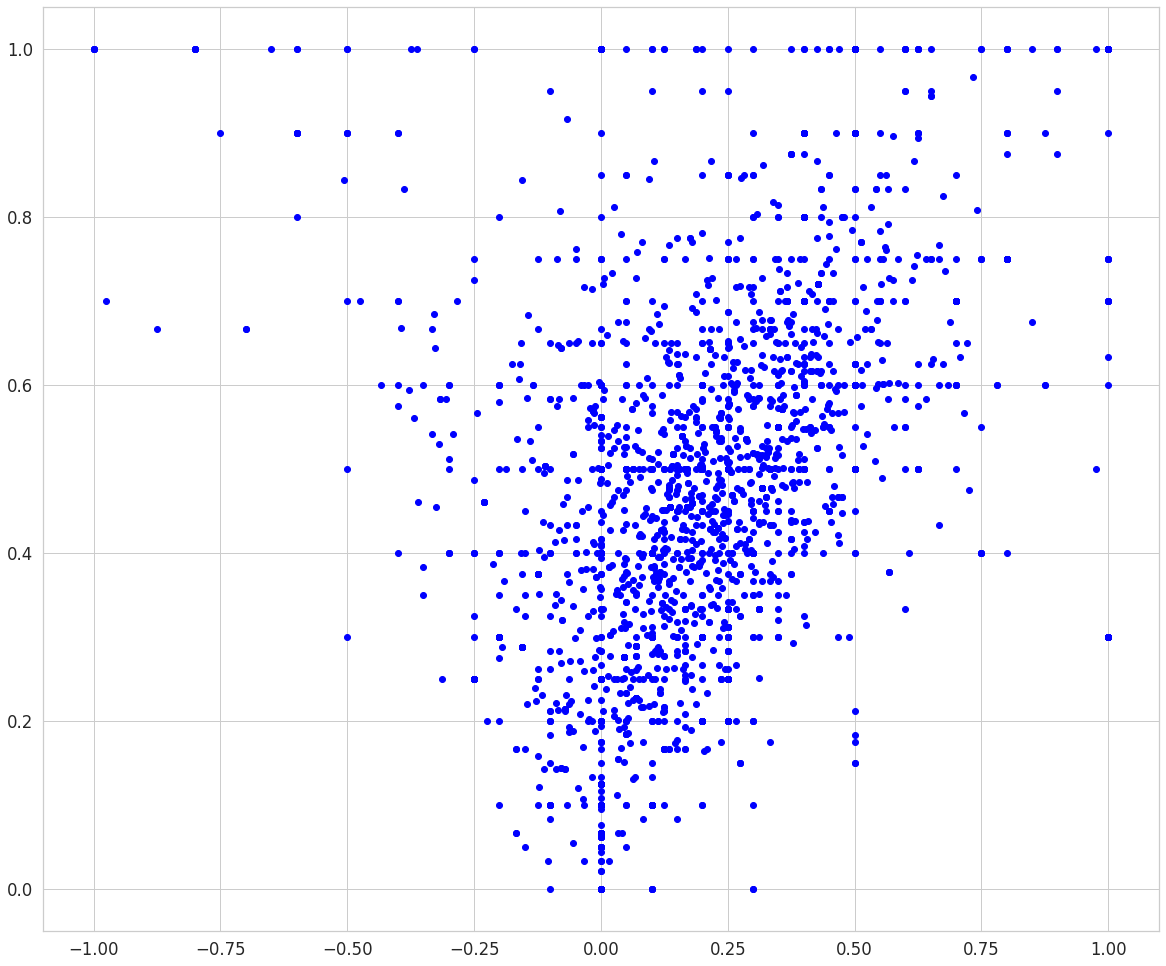

In [93]:
plt.figure(figsize=(20,17))
plt.scatter(data["Polarity"], data["Subjectivity"], color='Blue')

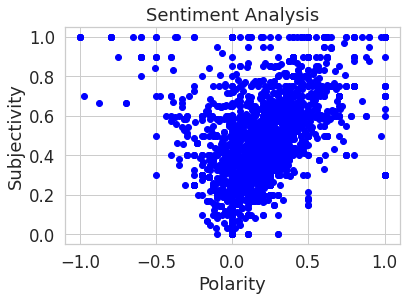

In [94]:
for i in range(0, data.shape[0]):
   plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color='Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Topic Modelling

In [95]:
# To import regular expressions for removing mentions to the airline
import re

# To import nltk to remove stopwords
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# To import gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# To import spacy for lemmatization
import spacy

# To import matplotlib and pyLDAvis to visualise the topic modelling results
import matplotlib.pyplot as plt
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Prepare Text Data


Since Gensim package only works on list, we will first have to transform the column 'text' to a list, then remove airline mentions. Please ignore the stopwords for now as we will come back to them later.

# Tokenize the words

To proceed, we will use Gensim's simple_preprocess() to tokenize each tweet into a list of words, removing punctuations and distracting characters.

In [97]:
def content_to_words(tweet_content):
    for tweet in tweet_content:
        yield(gensim.utils.simple_preprocess(str(tweet), deacc = True))

tweet_words = list(content_to_words(tweet_content))

print(tweet_words[10:20])

[['simon', 'mcglone', 'pushing', 'our', 'decarbonisation', 'strategy', 'into', 'action', 'more', 'to', 'come', 'xe', 'xa', 'ev', 'chargingforall', 'decarbonisation'], ['we', 've', 'got', 'some', 'more', 'exciting', 'news', 'we', 're', 'proud', 'to', 'announce', 'new', 'partnership', 'with', 'piketec', 'tpt', 'testing', 'tool', 'for', 'testing', 'autonomous', 'driving', 'and', 'assistance', 'functions', 'ev'], ['it', 'cloud', 'based', 'platform', 'iot', 'on', 'enables', 'charger', 'makers', 'to', 'dramatically', 'decrease', 'charger', 'downtime', 'while', 'also', 'monitoring', 'charger', 'condition', 'and', 'performance', 'ev', 'evcharging', 'evbatteries', 'evstartups'], ['smart', 'charging', 'solution', 'that', 'uses', 'over', 'the', 'air', 'tech', 'to', 'completely', 'charge', 'the', 'ev', 'based', 'on', 'the', 'user', 'preferred', 'time', 'this', 'plan', 'is', 'devised', 'by', 'taking', 'into', 'account', 'the', 'power', 'grid', 'xe', 'available', 'capacity', 'renewable', 'energy', '

# Create model to identify bigrams and trigrams

After tokenizing words, all tweet's text have been broken down into single words. However, we have a problem. There are several phrases which occurs frequently together and carry specific meaning in our context. Those are called bigrams or trigrams. Remember the old saying, "Half the bread is still bread, but half the truth is not the truth." Separating these words and analysing them in isolation will likely result in misleading result.

To address this problem, we would want to set up a method to link them together and Gensim's phrases model is a great tool to do the job.

In [98]:
bigram = gensim.models.Phrases(tweet_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[tweet_words], threshold = 100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

for word in trigram_mod[bigram_mod[tweet_words[10:20]]]:
    print(word)

['simon', 'mcglone', 'pushing', 'our', 'decarbonisation', 'strategy', 'into', 'action', 'more', 'to', 'come', 'xe', 'xa', 'ev', 'chargingforall', 'decarbonisation']
['we', 've_got', 'some', 'more', 'exciting', 'news', 'we', 're', 'proud', 'to', 'announce', 'new', 'partnership', 'with', 'piketec', 'tpt', 'testing', 'tool', 'for', 'testing', 'autonomous', 'driving', 'and', 'assistance', 'functions', 'ev']
['it', 'cloud', 'based', 'platform', 'iot', 'on', 'enables', 'charger', 'makers', 'to', 'dramatically', 'decrease', 'charger', 'downtime', 'while', 'also', 'monitoring', 'charger', 'condition', 'and', 'performance', 'ev', 'evcharging', 'evbatteries', 'evstartups']
['smart', 'charging', 'solution', 'that', 'uses', 'over', 'the', 'air', 'tech', 'to', 'completely', 'charge', 'the', 'ev', 'based', 'on', 'the', 'user', 'preferred', 'time', 'this', 'plan', 'is', 'devised', 'by', 'taking', 'into', 'account', 'the', 'power', 'grid', 'xe', 'available', 'capacity', 'renewable_energy', 'generation

# Cleansing tokenized words

As we observe the above set of tokenized words, we should not be happy yet. Our text isn't ready for the LDA model because of the 3 remaining issues.

The text still contains stopwords.
We have a model to identify bigrams and trigrams, but haven't applied the model to the text to create the actual bigrams and trigrams.
Despite same meanings, words coming from the same family (e.g. delayed, delaying, delay) are still counted separatedly.
As such, we will spare the next few steps to define and execute Python functions to eliminate stopwords, creating bigrams and lemmatizing words to address these 3 issues respectively.

In [99]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves','will','say','set',
              'go','may','come','see']

In [100]:
for word in list(tweet_words):  # iterating on a copy since removing will mess things up
    if word in STOP_WORDS:
        tweet_words.remove(word)

In [101]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_STOP_WORDS(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [102]:
# To remove stopwords
tweet_words_nostopword = remove_STOP_WORDS(tweet_words)

# To form bigrams
tweet_words_bigrams = make_bigrams(tweet_words_nostopword)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# To lematize while keeping only nouns, adjectives, verbs and adverbs
tweet_lemmatized = lemmatization(tweet_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(tweet_lemmatized[10:20])

[['push', 'decarbonisation', 'strategy', 'action', 'chargingforall', 'decarbonisation'], ['get', 'exciting', 'news', 'proud', 'announce', 'new', 'partnership', 'piketec', 'testing', 'tool', 'test', 'autonomous', 'driving', 'assistance', 'function'], ['base', 'enable', 'charger', 'maker', 'dramatically', 'decrease', 'charger', 'downtime', 'monitor', 'condition', 'performance', 'evcharge', 'evbatterie', 'evstartup'], ['smart', 'charge', 'solution', 'use', 'air', 'tech', 'completely', 'charge', 'base', 'user', 'prefer', 'time', 'plan', 'devise', 'take', 'account', 'power', 'grid', 'available', 'capacity', 'renewable', 'energy', 'generation', 'energy', 'price', 'evcharge'], ['provide', 'ultrafast', 'charge', 'instal', 'exist', 'infrastructure', 'cost', 'less', 'install', 'high', 'power', 'charger', 'ev', 'evcharge', 'evbatterie', 'evstartup'], ['amply', 'provide', 'charge', 'service', 'manage', 'element', 'fleet', 'charge', 'give', 'hassle', 'free', 'maintenance', 'give', 'service', 'level

# Create inputs for the LDA topic model

Before we proceed further, let's go through some core concepts related to the LDA topic model.

corpus: a collection of documents to be used as input to train the topic model and extract topic (In our case, it is the entire tweet's text after lemmatization)
document: any string object (e.g. a paragraph of text, news article, book, novel, ect. In our case, one document represents a chunk of text in the 'text' column)
token: any single word which will be converted to unique integer ID
dictionary: the mapping between token and its unique integer ID
In this section, we will define the the dictionary and the corpus, which are the two main inputs required for the LDA.

In [103]:
id2word = corpora.Dictionary(tweet_lemmatized)

texts = tweet_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[10:20])

[[(58, 1), (59, 1), (60, 2), (61, 1), (62, 1)], [(32, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(17, 1), (44, 1), (77, 1), (85, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1)], [(7, 1), (78, 1), (84, 1), (85, 1), (86, 1), (94, 1), (101, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1)], [(7, 1), (39, 2), (84, 1), (85, 1), (94, 3), (107, 1), (117, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 2)], [(0, 1), (84, 1), (85, 1), (94, 3), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 2), (

# Build topic model and find the optimal number of topics for LDA

Now all the prep is done, we are so close to build our very first topic model using Gensim LDA model.

Out of all parameters, the single most important parameter to be careful with is num_topics, which refers to the number of topics that you want the model to extract from your data. There is currently no standard practices for the optimal number of topics to be used, but as a general rule of thumb, we should go with the number of topics which generates the highest coherence value.

In order to find the optimal number of topics, we will create a function to calculate coherence value when using different number of topics between 2 and 40 and select the one with the highest coherence value. It is important to note that having too many topics will hinder our understand as we are interested in the big picture and main ideas. Therefore, for such a small dataset with approximately 14,000 records, we won't go beyond 40 topics to avoid going into too granular sub-topics.

In [104]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=2000, passes=20, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweet_lemmatized, start=2, limit=40, step=6)

In [105]:
# To print the coherence scores to determine the highest coherence value 
for m, cv in zip(model_list, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = LdaModel(num_terms=5359, num_topics=2, decay=0.5, chunksize=2000)  has Coherence Value of 0.2056
Num Topics = LdaModel(num_terms=5359, num_topics=8, decay=0.5, chunksize=2000)  has Coherence Value of 0.2589
Num Topics = LdaModel(num_terms=5359, num_topics=14, decay=0.5, chunksize=2000)  has Coherence Value of 0.302
Num Topics = LdaModel(num_terms=5359, num_topics=20, decay=0.5, chunksize=2000)  has Coherence Value of 0.3301
Num Topics = LdaModel(num_terms=5359, num_topics=26, decay=0.5, chunksize=2000)  has Coherence Value of 0.3467
Num Topics = LdaModel(num_terms=5359, num_topics=32, decay=0.5, chunksize=2000)  has Coherence Value of 0.3599
Num Topics = LdaModel(num_terms=5359, num_topics=38, decay=0.5, chunksize=2000)  has Coherence Value of 0.3719


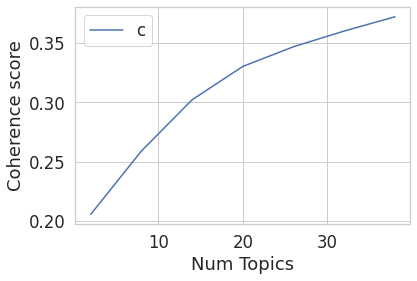

In [106]:
# To plot a graph showing the coherence scores against number of topics
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Based on the coherence scores obtained from different number of topics, we will choose 35 as the final number of topics for the LDA model in subsequent visualisation.

In [107]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, update_every=1, chunksize=2000, passes=20, alpha='auto', per_word_topics=True)


#  Visualise Topic Modelling with pyLDAvis

Leveraging the above LDA model, we will create chart using pyLDAvis to visualise the topics-keywords.

In [108]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.021255  0.039025       1        1  13.858727
1      0.072484 -0.191867       2        1  12.824345
6      0.009169 -0.049307       3        1  12.822207
0      0.015352 -0.038934       4        1   9.864929
2      0.048273  0.027365       5        1   9.751444
3      0.009237  0.015220       6        1   9.444277
4     -0.092997  0.002436       7        1   8.959966
7      0.185843  0.090654       8        1   8.390844
9     -0.175684 -0.070583       9        1   8.088006
5     -0.092931  0.175993      10        1   5.995254, topic_info=                Term        Freq       Total Category  logprob  loglift
0            battery  443.000000  443.000000  Default  30.0000  30.0000
209  renewableenergy  160.000000  160.000000  Default  29.0000  29.0000
165         electric  510.000000  510.000000  Default  28.0000  28.0000
164              car  468.000000  468.000000  Default  27.0000  27.0000
94            charge  413.000000  413.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
110             cost   11.233734   79.370531  Topic10  -5.2471   0.8590
165         electric   15.553712  510.819512  Topic10  -4.9217  -0.6775
94            charge   12.713892  413.106640  Topic10  -5.1233  -0.6668
220             good    9.879020   96.559043  Topic10  -5.3756   0.5345
78           charger    9.257934  119.593854  Topic10  -5.4406   0.2556

[711 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2027      3  0.808934     ability
2027      4  0.101117     ability
1374      1  0.083709  accelerate
1374      4  0.209274  accelerate
1374      6  0.125564  accelerate
...     ...       ...         ...
234       6  0.041077        year
234       7  0.219078        year
234       9  0.116385        year
256       8  0.855107     youtube
256       9  0.071259     youtube

[1506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 7, 1, 3, 4, 5, 8, 10, 6])